<a href="https://colab.research.google.com/github/JASalles/Analise-Resort/blob/main/Case_Resort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparação da Base**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
# Importação da base
df_inicial = pd.read_excel('dados_resort.xlsx')

# Visualização da estrutura e tamanho da base inicial
len(df_inicial)

display(df_inicial)

,reserva_cancelada,tempo_antecedencia,data_chegada,ano_chegada,mes_chegada,diadomes_chegada,nro_noites_fds,nro_noites_dds,adultos,criancas,...,segmento_mercado,cliente_recorrente,tipo_quarto,tipo_pgto,agencia_turismo,receita_por_noite,calculado,pedidos_especiais,status_reserva,data_status_reserva
0,1,75,2015-07-01,2015,7,1,0,3,2,0,...,AT Offline,0,D,Sem pgto,15.0,105.50,NaN,0,Cancelada,2015-04-22
1,1,85,2015-07-01,2015,7,1,0,3,2,0,...,AT Online,0,A,Sem pgto,240.0,82.00,NaN,1,Cancelada,2015-05-06
2,1,60,2015-07-01,2015,7,1,2,5,2,0,...,AT Online,0,E,Sem pgto,240.0,107.00,NaN,2,Cancelada,2015-05-11
3,1,96,2015-07-01,2015,7,1,2,8,2,0,...,Direta,0,E,Sem pgto,NaN,108.30,NaN,2,Cancelada,2015-05-29
4,1,23,2015-07-01,2015,7,1,0,4,2,0,...,AT Online,0,E,Sem pgto,240.0,123.00,NaN,0,Cancelada,2015-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39854,0,227,2017-08-31,2017,8,31,2,5,2,1,...,AT Online,0,A,Sem pgto,241.0,125.58,NaN,1,Confirmada,2017-09-07
39855,0,217,2017-08-31,2017,8,31,2,7,2,0,...,AT Offline,0,D,Sem pgto,40.0,110.80,NaN,0,Confirmada,2017-09-09
39856,0,212,2017-08-31,2017,8,31,2,8,2,1,...,AT Offline,0,A,Sem pgto,143.0,89.75,NaN,0,Confirmada,2017-09-10
39857,0,211,2017-08-31,2017,8,31,4,10,2,0,...,AT Offline,0,D,Sem pgto,40.0,112.80,NaN,1,Confirmada,2017-09-14


In [12]:
# Removendo duplicadas
df_inicial_2 = df_inicial.drop_duplicates()

# Removendo linhas vazias
df_resort = df_inicial.dropna(how="all")

len(df_resort)

39859

# **Análise de Comportamento da Receita**

# Quantidade de Reservas por Ano (considerando todos os status)

In [15]:
df_reserva_ano = df_resort.groupby("ano_chegada")["data_chegada"].count().reset_index(name="qtd_reservas")
display(df_reserva_ano)

,ano_chegada,qtd_reservas
0,2015,8281
1,2016,18464
2,2017,13114


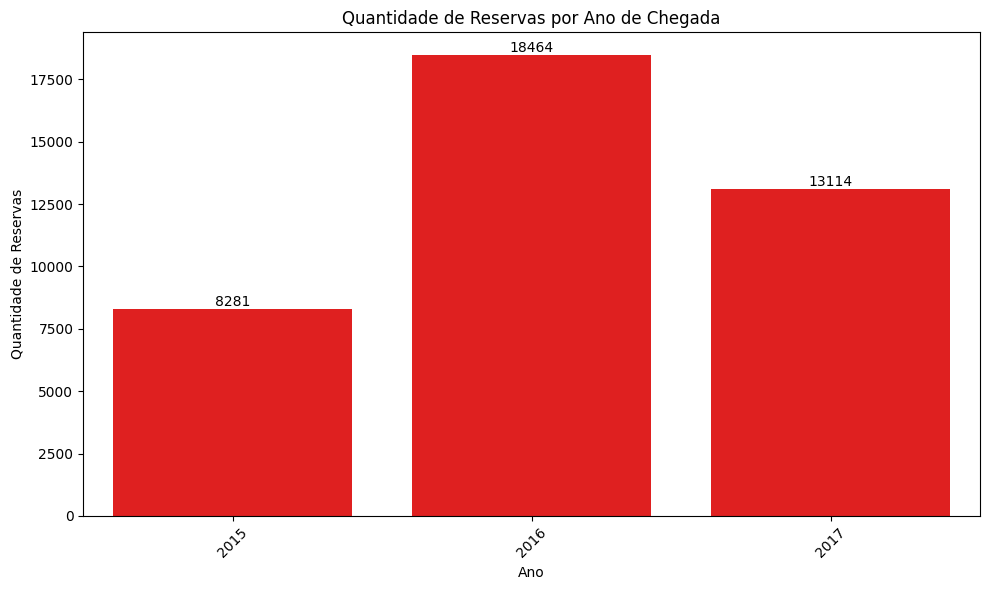

In [18]:
# Criação do Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_reserva_ano, x="ano_chegada", y="qtd_reservas", color='red')

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 1,
            f'{int(altura)}',
            ha='center', va='bottom', fontsize=10)

plt.title("Quantidade de Reservas por Ano de Chegada")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Reservas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quantidade de Reservas Não Canceladas por Ano

In [19]:
# Total de Reservas
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra pelas reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa por ano de chegada
df_reserva_ano = df_filtrado.groupby("ano_chegada")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_ano)

,ano_chegada,qtd_reservas
0,2015,6144
1,2016,13552
2,2017,9074


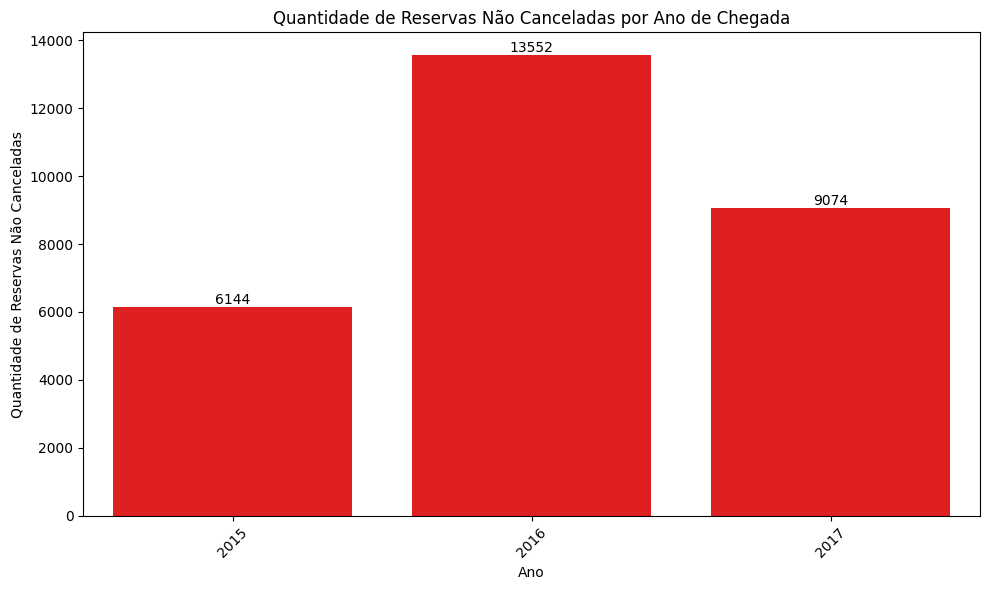

In [64]:
# Criação do Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_reserva_ano, x="ano_chegada", y="qtd_reservas", color='red')

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 1,
            f'{int(altura)}',
            ha='center', va='bottom', fontsize=10)

plt.title("Quantidade de Reservas Não Canceladas por Ano de Chegada")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Reservas Não Canceladas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quantidade de Reservas Canceladas por Ano

In [20]:
# Tratamento do tipo das colunas e formatação da data
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Filtra pelas reservas canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 1]

# Agrupa por ano de chegada
df_reserva_ano = df_filtrado.groupby("ano_chegada")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_ano)

,ano_chegada,qtd_reservas
0,2015,2137
1,2016,4912
2,2017,4040


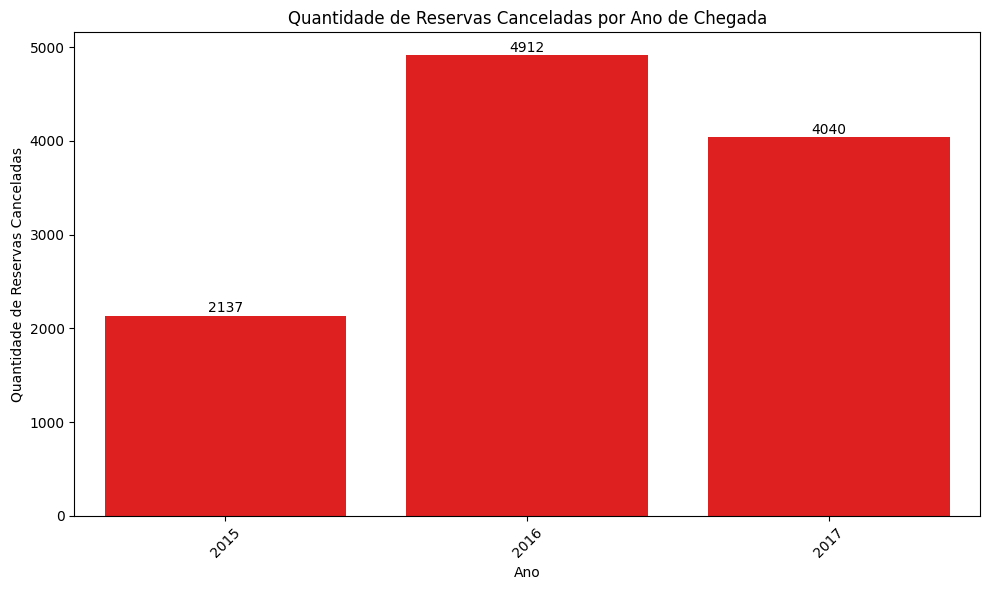

In [21]:
# Criação do Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_reserva_ano, x="ano_chegada", y="qtd_reservas", color='red')

for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 1,
            f'{int(altura)}',
            ha='center', va='bottom', fontsize=10)

plt.title("Quantidade de Reservas Canceladas por Ano de Chegada")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Reservas Canceladas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Receita Anual (considerando a data de chegada)

In [22]:
# Tratamento do tipo das colunas e formatação da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Receita Anual = confirmados + (ausentes e cancelados com pagamento não
# reembolsável)
df_receita_confirmados = (
    df_resort[
        ((df_resort["status_reserva"] == "Confirmada"))|
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))|
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))]
    .groupby("ano_chegada")["calculado_2"]
    .sum()
)

display(df_receita_confirmados)

,calculado_2
ano_chegada,
2015,2727621.60
2016,5051775.14
2017,4258448.15


Receita Perdida (por reservas canceladas ou ausências com pagamento reembolsável)

In [23]:
# Tratamento do tipo das colunas e formatação da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Receita Perdida = cancelados e ausentes com pagamento reembolsável
df_receita_perdida = (
    df_resort[
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto reembolsável"))|
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto reembolsável"))]
    .groupby("ano_chegada")["calculado_2"]
    .sum()
)

display(df_receita_perdida)

,calculado_2
ano_chegada,
2016,1600.00
2017,7777.05


# Receita Mensal

In [24]:
# Tratamento do tipo das colunas e formatação da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Filtra e agrupa por ano e mês
df_receita_confirmados = (
    df_resort[
        (df_resort["status_reserva"] == "Confirmada") |
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
    ]
    .groupby(["ano_chegada", "mes_chegada"])["calculado_2"]
    .sum()
    .reset_index()
    .sort_values(by=["ano_chegada", "mes_chegada"])
)

display(df_receita_confirmados)


,ano_chegada,mes_chegada,calculado_2
0,2015,7,684769.10
1,2015,8,852455.22
2,2015,9,508844.33
3,2015,10,316846.63
4,2015,11,155353.15
5,2015,12,209353.17
6,2016,1,91089.31
7,2016,2,192451.12
8,2016,3,303459.57
9,2016,4,391524.47


# Receita por Segmento de Mercado

In [25]:
# Tratamento do tipo das colunas e formatação da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Filtrar e agrupar por ano e segmento de mercado
df_receita_confirmados = (
    df_resort[
        (df_resort["status_reserva"] == "Confirmada") |
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
    ]
    .groupby(["ano_chegada","segmento_mercado"])["calculado_2"]
    .sum()
    .reset_index()
    .sort_values(by=["ano_chegada","segmento_mercado"])
)

display(df_receita_confirmados)

,ano_chegada,segmento_mercado,calculado_2
0,2015,AT Offline,853012.42
1,2015,AT Online,984665.11
2,2015,Corporativo,81786.13
3,2015,Direta,584080.83
4,2015,Grupos,224077.11
5,2016,AT Offline,1359260.92
6,2016,AT Online,2030999.45
7,2016,Corporativo,63465.63
8,2016,Direta,936978.63
9,2016,Grupos,661070.51


# Ticket Médio por Segmento de Mercado

In [26]:
# Filtrar as reservas confirmadas e canceladas e ausentes não reembolsáveis
df_filtrado = df_resort[
    (df_resort["status_reserva"] == "Confirmada") |
    ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
    ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
]

# Agrupa por segmento, calcular receita total e número de reservas
df_ticket_medio = (
    df_filtrado
    .groupby("segmento_mercado")
    .agg(
        receita_total=("calculado_2", "sum"),
        qtd_reservas=("segmento_mercado", "count")
    )
    .reset_index()
)

# Calcula o ticket médio
df_ticket_medio["ticket_medio"] = df_ticket_medio["receita_total"] / df_ticket_medio["qtd_reservas"]

display(df_ticket_medio.sort_values(by="ticket_medio", ascending=False))


,segmento_mercado,receita_total,qtd_reservas,ticket_medio
0,AT Offline,3144863.08,6483,485.093796
3,Direta,2441868.50,5635,433.339574
1,AT Online,4958469.40,11510,430.796646
4,Grupos,1278337.12,4816,265.435449
2,Corporativo,214306.79,1976,108.454853


# Receita Perdida por Segmento de Mercado

In [27]:
# Tratamento do tipo das colunas e formatação da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Filtra e agrupa por ano e e segmento de mercado
df_receita_perdida = (
    df_resort[
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto reembolsável"))|
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto reembolsável"))]
    .groupby(["ano_chegada","segmento_mercado"])["calculado_2"]
    .sum()
    .reset_index()
    .sort_values(by=["ano_chegada","segmento_mercado"])
)

display(df_receita_perdida)

,ano_chegada,segmento_mercado,calculado_2
0,2016,Grupos,1600.00
1,2017,AT Offline,1428.14
2,2017,AT Online,4310.41
3,2017,Direta,1039.50
4,2017,Grupos,999.00


# Receita por País

In [28]:
# Tratamento do tipo das colunas e formatação da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Filtra e agrupa por país
df_receita_confirmados = (
    df_resort[
        (df_resort["status_reserva"] == "Confirmada") |
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
    ]
    .groupby(["país"])["calculado_2"]
    .sum()
    .reset_index()
    .sort_values(by=["país"])
)

display(df_receita_confirmados)

,país,calculado_2
0,AGO,5363.80
1,ALB,533.45
2,AND,2832.00
3,ARE,2613.99
4,ARG,18096.60
...,...,...
113,VEN,430.40
114,VNM,869.25
115,ZAF,6312.08
116,ZMB,580.02


In [32]:
# Cria mapa de calor tendo os países como base
fig = px.choropleth(
    df_receita_confirmados,
    locations="país",
    locationmode="ISO-3",
    color="calculado_2",
    color_continuous_scale="Reds",
    title="Receita Estimada por País de Origem dos Hóspedes",
    labels={"calculado_2": "Receita Total (R$)"}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Receita (R$)")
)

fig.show()

# **Análise de Perfil da Receita**

# Taxa de Cancelamentos por País

Volume de reservas canceladas por país

In [34]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra as reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa por país
df_reserva_ano = df_filtrado.groupby("país")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_ano)

,país,qtd_reservas
0,AGO,16
1,ALB,2
2,AND,2
3,ARE,3
4,ARG,48
...,...,...
113,VEN,2
114,VNM,2
115,ZAF,12
116,ZMB,1


Quantidade de Países por Quantidade de Reservas


In [35]:
df_reserva_ano.groupby('qtd_reservas')['país'].count()

,país
qtd_reservas,
1,25
2,17
3,6
4,6
5,5
6,5
7,4
8,2
9,4


Taxa de cancelamento por país

In [36]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Calcula o total de reservas
df_total = df_resort.groupby("país")["reserva_cancelada"].count().reset_index(name="qtd_total_reservas")

# Calcula o total de reservas canceladas
df_canceladas = df_resort[df_resort["reserva_cancelada"] == 1].groupby("país")["reserva_cancelada"].count().reset_index(name="qtd_reservas_canceladas")

# União dos dois dfs
df_taxa_cancelamento = pd.merge(df_total, df_canceladas, on="país", how="left")

# Tratamento para NaN
df_taxa_cancelamento["qtd_reservas_canceladas"] = df_taxa_cancelamento["qtd_reservas_canceladas"].fillna(0)

# Calcula taxa de cancelamento
df_taxa_cancelamento["taxa_cancelamento"] = (df_taxa_cancelamento["qtd_reservas_canceladas"] / df_taxa_cancelamento["qtd_total_reservas"]) * 100

# Ordena pelos países com maior taxa
df_taxa_cancelamento = df_taxa_cancelamento.sort_values(by="taxa_cancelamento", ascending=False)

display(df_taxa_cancelamento)


,país,qtd_total_reservas,qtd_reservas_canceladas,taxa_cancelamento
12,BHR,1,1.0,100.0
47,GGY,1,1.0,100.0
43,FJI,1,1.0,100.0
112,TUN,1,1.0,100.0
61,JEY,3,3.0,100.0
...,...,...,...,...
111,THA,6,0.0,0.0
119,UZB,1,0.0,0.0
121,VNM,2,0.0,0.0
123,ZMB,1,0.0,0.0


# Taxa de Cancelamento Por Segmento de Mercado

In [38]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Calcula o total de reservas
df_total = df_resort.groupby("segmento_mercado")["reserva_cancelada"].count().reset_index(name="qtd_total_reservas")

# Calcula o total de reservas canceladas
df_canceladas = df_resort[df_resort["reserva_cancelada"] == 1].groupby("segmento_mercado")["reserva_cancelada"].count().reset_index(name="qtd_reservas_canceladas")

# União dos dois dfs
df_taxa_cancelamento = pd.merge(df_total, df_canceladas, on="segmento_mercado", how="left")

# Tratamento para NaN
df_taxa_cancelamento["qtd_reservas_canceladas"] = df_taxa_cancelamento["qtd_reservas_canceladas"].fillna(0)

# Calcula taxa de cancelamento
df_taxa_cancelamento["taxa_cancelamento"] = (df_taxa_cancelamento["qtd_reservas_canceladas"] / df_taxa_cancelamento["qtd_total_reservas"]) * 100

# Ordena pelos países com maior taxa
df_taxa_cancelamento = df_taxa_cancelamento.sort_values(by="taxa_cancelamento", ascending=False)

display(df_taxa_cancelamento)

,segmento_mercado,qtd_total_reservas,qtd_reservas_canceladas,taxa_cancelamento
4,Grupos,5836,2474,42.392049
1,AT Online,17729,6248,35.241694
0,AT Offline,7472,1138,15.230193
2,Corporativo,2309,351,15.201386
3,Direta,6513,878,13.480731


# Reservas por Tipo de Alimentação

In [39]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra as reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa por tipo de alimentação
df_reserva_aliment = df_filtrado.groupby(["alimentacao"])["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_aliment)

,alimentacao,qtd_reservas
0,BB,22023
1,FB,306
2,HB,5484
3,SC,78
4,Undefined,879


# Reservas por Tipo de Quarto

In [40]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra as reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa por tipo de quarto
df_reserva_quarto = df_filtrado.groupby("tipo_quarto")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_quarto)

,tipo_quarto,qtd_reservas
0,A,16920
1,B,3
2,C,611
3,D,5463
4,E,3552
5,F,903
6,G,960
7,H,354
8,L,4


Receita por Tipo de Quarto

In [41]:
# Tratamento do tipo da coluna e formato da data
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Filtrar e agrupar por ano e tipo de quarto
df_receita_confirmados = (
    df_resort[
        (df_resort["status_reserva"] == "Confirmada") |
        ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
        ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
    ]
    .groupby(["ano_chegada","tipo_quarto"])["calculado_2"]
    .sum()
    .reset_index()
    .sort_values(by=["ano_chegada","tipo_quarto"])
)

display(df_receita_confirmados)

,ano_chegada,tipo_quarto,calculado_2
0,2015,A,1273349.97
1,2015,B,268.00
2,2015,C,88070.92
3,2015,D,652181.66
4,2015,E,446707.69
5,2015,F,94573.69
6,2015,G,126161.91
7,2015,H,45553.76
8,2015,L,754.00
9,2016,A,2249010.17


Ticket Médio por Quarto

In [42]:
# Filtrar as reservas confirmadas e canceladas e ausentes não reembolsáveis
df_filtrado = df_resort[
    (df_resort["status_reserva"] == "Confirmada") |
    ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
    ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
]

# Agrupa por tipo de quarto, calcular receita total e número de reservas
df_ticket_medio = (
    df_filtrado
    .groupby("tipo_quarto")
    .agg(
        receita_total=("calculado_2", "sum"),
        qtd_reservas=("tipo_quarto", "count")
    )
    .reset_index()
)

# Calcular o ticket médio
df_ticket_medio["ticket_medio"] = df_ticket_medio["receita_total"] / df_ticket_medio["qtd_reservas"]

display(df_ticket_medio.sort_values(by="ticket_medio", ascending=False))

,tipo_quarto,receita_total,qtd_reservas,ticket_medio
2,C,443399.72,611,725.695123
6,G,653847.29,961,680.382196
7,H,237595.17,356,667.402163
5,F,564676.76,903,625.334175
4,E,2011226.53,3609,557.280834
3,D,2893363.69,5637,513.280768
0,A,5232533.73,18336,285.369422
8,L,754.00,4,188.500000
1,B,448.00,3,149.333333


# Reservas por Dia da Semana

In [44]:
# Tratamento do tipo da coluna e formato da data para dia da semana (Segunda = 0 e Domingo = 6)
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)
df_resort["dia_semana_num"] = df_resort["data_chegada"].dt.weekday

# Filtra as reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa por ano de chegada
df_reserva_ds = df_filtrado.groupby("dia_semana_num")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_ds)

,dia_semana_num,qtd_reservas
0,0,4689
1,1,3696
2,2,3716
3,3,4614
4,4,3819
5,5,4705
6,6,3531


# Reservas por Tempo de Atentecedência (Histograma)

In [45]:
# Tratamento do tipo da coluna e formato da data
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra as reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa por tempo de antecedência
df_reserva_quarto = df_filtrado.groupby("tempo_antecedencia")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_quarto)

,tempo_antecedencia,qtd_reservas
0,0,3057
1,1,1494
2,2,848
3,3,714
4,4,610
...,...,...
393,468,17
394,532,1
395,542,23
396,709,1


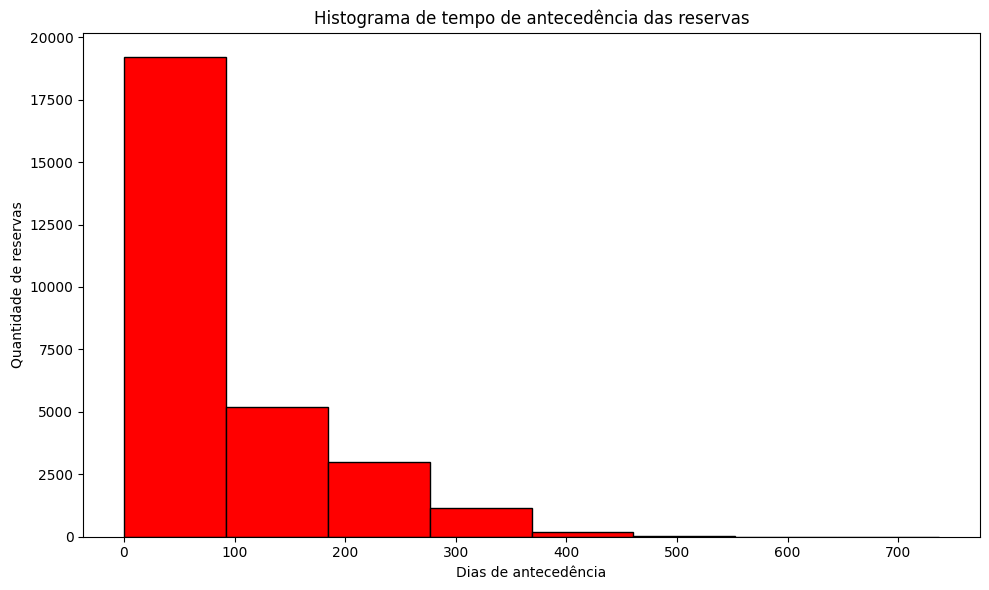

In [57]:
# Histograma sem a criação de faixas de tempo
plt.figure(figsize=(10,6))
plt.hist(df_filtrado["tempo_antecedencia"], bins=8, color='red', edgecolor='black')  # você pode ajustar o número de bins
plt.title("Histograma de tempo de antecedência das reservas")
plt.xlabel("Dias de antecedência")
plt.ylabel("Quantidade de reservas")
plt.tight_layout()
plt.show()

In [46]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Cria as faixas de antecedência (em dias)
bins = [0, 7, 14, 30, 60, 90, 180, 365, df_filtrado["tempo_antecedencia"].max()]
labels = ["Até 7 dias", "8-14 dias", "15-30 dias", "31-60 dias", "61-90 dias", "91-180 dias", "181-365 dias", "Mais de 1 ano"]

# Cria a coluna de faixa de antecedência
df_filtrado["faixa_antecedencia"] = pd.cut(df_filtrado["tempo_antecedencia"], bins=bins, labels=labels, include_lowest=True)

# Agrupa por faixa de antecedência
df_hist = df_filtrado.groupby("faixa_antecedencia")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_hist)


<ipython-input-46-8e4e5de25ec2>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-8e4e5de25ec2>:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,faixa_antecedencia,qtd_reservas
0,Até 7 dias,8265
1,8-14 dias,2018
2,15-30 dias,2933
3,31-60 dias,3501
4,61-90 dias,2394
5,91-180 dias,5136
6,181-365 dias,4286
7,Mais de 1 ano,237


<ipython-input-47-67f5c426ee94>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




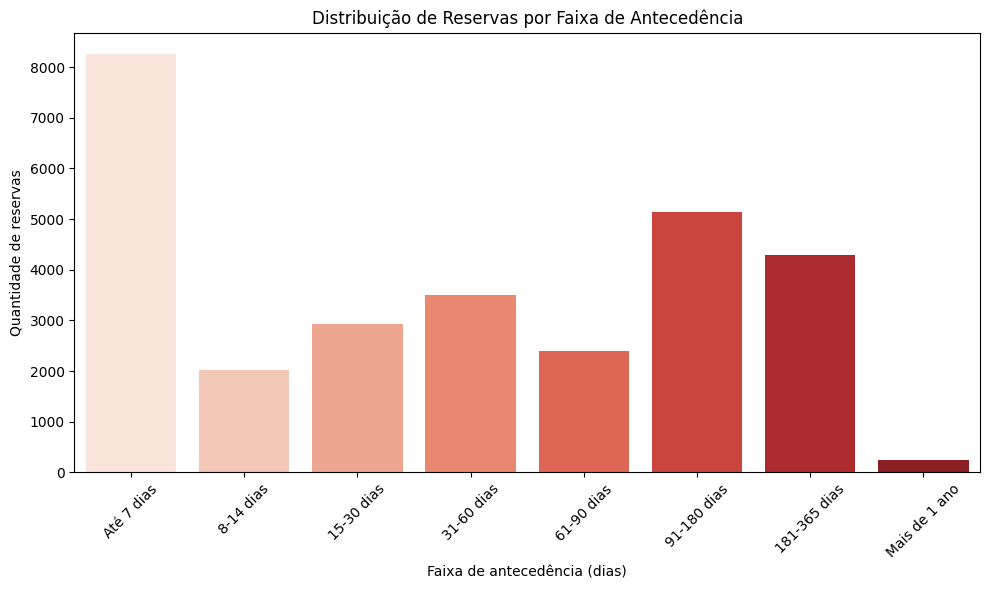

In [47]:
# Histograma com a criação de faixas de tempo
plt.figure(figsize=(10,6))
sns.barplot(data=df_hist, x="faixa_antecedencia", y="qtd_reservas", palette="Reds")
plt.xticks(rotation=45)
plt.title("Distribuição de Reservas por Faixa de Antecedência")
plt.xlabel("Faixa de antecedência (dias)")
plt.ylabel("Quantidade de reservas")
plt.tight_layout()
plt.show()

Quantidade de reservas por faixa de antecedência e tipo de pagamento

In [50]:
# Agrupa por faixa de antecedência e tipo de pagamento
df_pagamento_antecedencia = df_filtrado.groupby(["faixa_antecedencia", "tipo_pgto"])["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_pagamento_antecedencia)


<ipython-input-50-8fd45506c621>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,faixa_antecedencia,tipo_pgto,qtd_reservas
0,Até 7 dias,Pgto não reembolsável,11
1,Até 7 dias,Pgto reembolsável,4
2,Até 7 dias,Sem pgto,8250
3,8-14 dias,Pgto não reembolsável,2
4,8-14 dias,Pgto reembolsável,23
5,8-14 dias,Sem pgto,1993
6,15-30 dias,Pgto não reembolsável,13
7,15-30 dias,Pgto reembolsável,0
8,15-30 dias,Sem pgto,2920
9,31-60 dias,Pgto não reembolsável,0


Taxa de cancelamento por faixa de antecedência

In [53]:
# Cria a coluna de faixa de antecedência
df_resort["faixa_antecedencia"] = pd.cut(df_resort["tempo_antecedencia"], bins=bins, labels=labels, include_lowest=True)

# Calcula o total de reservas
df_total_por_faixa = df_resort.groupby("faixa_antecedencia")["reserva_cancelada"].count().reset_index(name="qtd_total_reservas")

# Calcula o total de reservas canceladas
df_canceladas_por_faixa = df_resort[df_resort["reserva_cancelada"] == 1].groupby("faixa_antecedencia")["reserva_cancelada"].count().reset_index(name="qtd_reservas_canceladas")

# União dos dois dfs
df_taxa_cancelamento_antecedencia = pd.merge(df_total_por_faixa, df_canceladas_por_faixa, on="faixa_antecedencia", how="left")

# Tratamento para NaN
df_taxa_cancelamento_antecedencia["qtd_reservas_canceladas"] = df_taxa_cancelamento_antecedencia["qtd_reservas_canceladas"].fillna(0)

# Calcula a taxa de cancelamento por faixa de antecedência
df_taxa_cancelamento_antecedencia["taxa_cancelamento"] = (df_taxa_cancelamento_antecedencia["qtd_reservas_canceladas"] / df_taxa_cancelamento_antecedencia["qtd_total_reservas"]) * 100

# Exibe o resultado
display(df_taxa_cancelamento_antecedencia)

<ipython-input-53-7140ec12505a>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-53-7140ec12505a>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,faixa_antecedencia,qtd_total_reservas,qtd_reservas_canceladas,taxa_cancelamento
0,Até 7 dias,8838,573,6.483367
1,8-14 dias,2423,405,16.714816
2,15-30 dias,3920,987,25.178571
3,31-60 dias,5062,1561,30.837614
4,61-90 dias,3666,1272,34.697218
5,91-180 dias,8207,3071,37.419276
6,181-365 dias,7299,3013,41.279627
7,Mais de 1 ano,444,207,46.621622


<ipython-input-54-8c5ca85d8d96>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




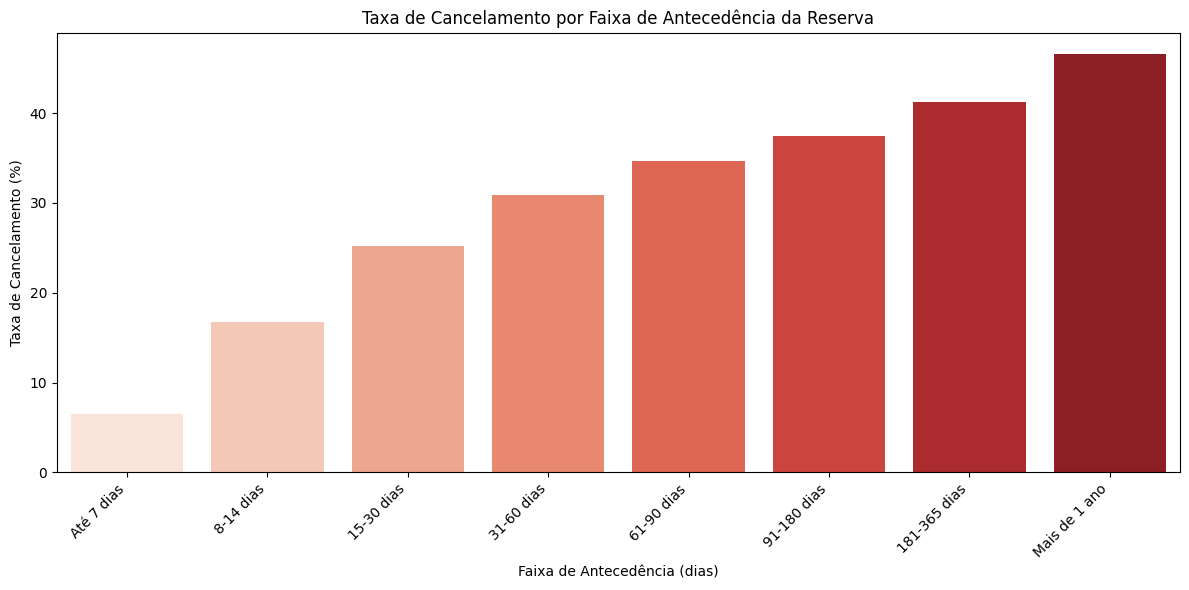

In [54]:
# Cria gráfico da taxa de cancelamento por faixa de antecedência
plt.figure(figsize=(12, 6))
sns.barplot(data=df_taxa_cancelamento_antecedencia, x="faixa_antecedencia", y="taxa_cancelamento", palette="Reds")
plt.xticks(rotation=45, ha='right')
plt.title("Taxa de Cancelamento por Faixa de Antecedência da Reserva")
plt.xlabel("Faixa de Antecedência (dias)")
plt.ylabel("Taxa de Cancelamento (%)")
plt.tight_layout()
plt.show()

# Reservas Por Grupos (Agrupamento Adultos, Crianças e Bebês)

In [55]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Filtra as reservas não canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 0]

# Agrupa adultos, crianças e bêbes
df_reserva_grupo = df_filtrado.groupby(["adultos","criancas","bebes"])["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_grupo)

,adultos,criancas,bebes,qtd_reservas
0,0,0,0,11
1,1,0,0,5752
2,1,0,1,2
3,1,1,0,61
4,1,1,1,2
5,1,2,0,32
6,1,3,0,1
7,2,0,0,19626
8,2,0,1,344
9,2,0,2,7


# Quantidade de Reservas de Clientes Recorrentes ao Longo do Tempo

In [56]:
# Seleciona clientes recorrentes
df_recorrentes = df_resort[df_resort["cliente_recorrente"] == 1]

# Agrupar por data de chegada
df_recorrentes_tempo = df_recorrentes.groupby(df_recorrentes["data_chegada"].dt.to_period("M"))["data_chegada"].count().reset_index(name="qtd_reservas_recorrentes")

# Tratamento do tipo da coluna
df_recorrentes_tempo["data_chegada"] = df_recorrentes_tempo["data_chegada"].astype(str)

# Exibir o resultado
display(df_recorrentes_tempo)

,data_chegada,qtd_reservas_recorrentes
0,2015-07,10
1,2015-08,10
2,2015-09,19
3,2015-10,17
4,2015-11,35
5,2015-12,40
6,2016-01,71
7,2016-02,133
8,2016-03,100
9,2016-04,95


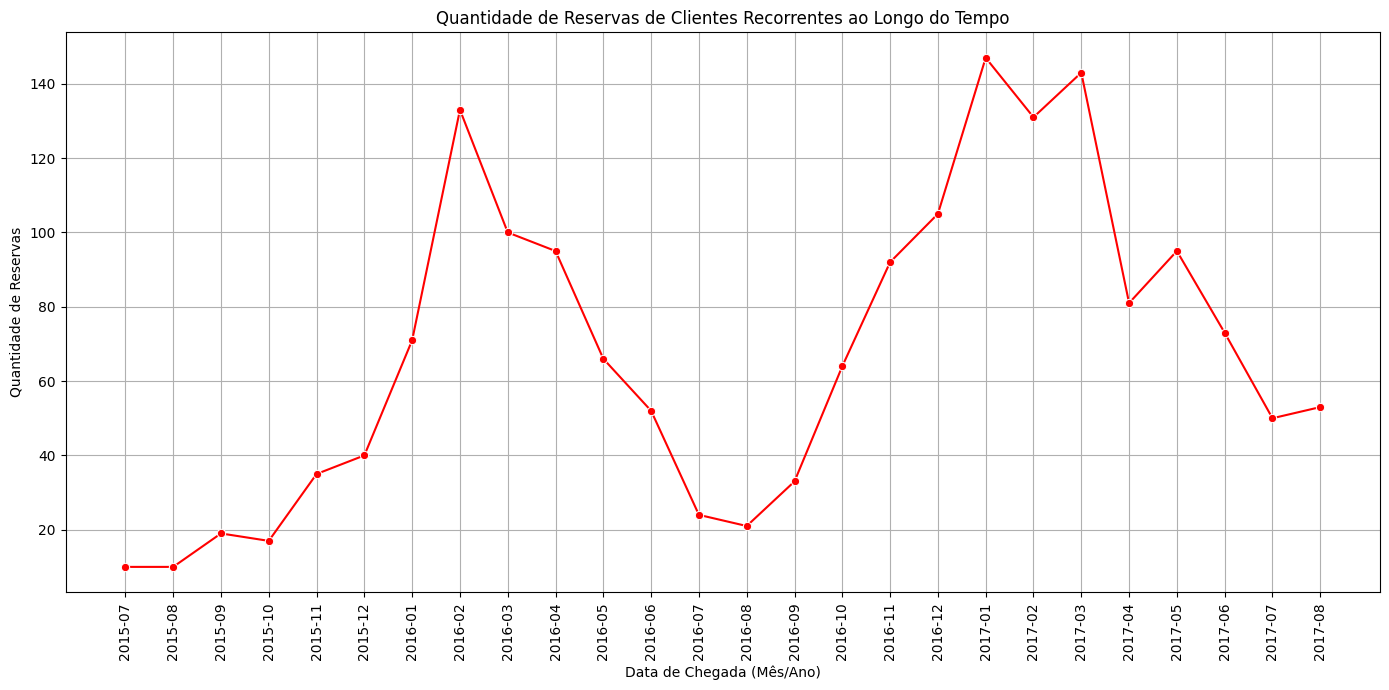

In [57]:
# Cria gráfico da quantidade de reservas de clientes recorrentes ao longo do tempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_recorrentes_tempo, x="data_chegada", y="qtd_reservas_recorrentes", marker='o', color='red')
plt.title("Quantidade de Reservas de Clientes Recorrentes ao Longo do Tempo")
plt.xlabel("Data de Chegada (Mês/Ano)")
plt.ylabel("Quantidade de Reservas")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Quantidade de Clientes Recorrentes por ano

In [58]:
# Seleciona clientes recorrentes
df_recorrentes = df_resort[df_resort["cliente_recorrente"] == 1]

# Agrupa por ano de chegada
df_recorrentes_ano = df_recorrentes.groupby(df_recorrentes["ano_chegada"])["data_chegada"].count().reset_index(name="qtd_reservas_recorrentes")

display(df_recorrentes_ano)

,ano_chegada,qtd_reservas_recorrentes
0,2015,131
1,2016,856
2,2017,773


# Teste de Hipótese: Clientes Recorrentes Cancelam menos que Clientes Novos?



**Hipóteses**

H0: A amostra segue uma distribuição normal

H1: A amostra não segue uma distribuição normal

Se p-value < 0.05, rejeita-se a hipótese nula.

In [62]:
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu

In [61]:
# Verificação de Distribuição Normal

# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Clientes recorrentes (cliente_recorrente == 1)
recorrentes = df_resort[df_resort["cliente_recorrente"] == 1]["reserva_cancelada"]

# Clientes novos (cliente_recorrente == 0)
novos = df_resort[df_resort["cliente_recorrente"] == 0]["reserva_cancelada"]

# Aplicando Kolmogorov-Smirnov
statistic, pvalue = ks_2samp(recorrentes, novos)
print(f"statistic={statistic}, pvalue={pvalue}")
if pvalue < 0.05:
    print('Rejeita a hipótese nula')
else:
    print('Não rejeita a hipótese nula')

statistic=0.22507586395729784, pvalue=2.3825716054234974e-75
Rejeita a hipótese nula


**Hipóteses**

H0: A quantidade de clientes recorrentes que cancelam as reservas é maior ou igual a quantidade de clientes novos que cancelam as reservas

H1: A quantidade de clientes recorrentes que cancelam as reservas é menor que a quantidade de clientes novos que cancelam as reservas

In [63]:
# Separando os dois grupos
# Clientes recorrentes (cliente_recorrente == 1)
# Clientes novos (cliente_recorrente == 0)
recorrentes = df_resort[df_resort["cliente_recorrente"] == 1]["reserva_cancelada"]
novos = df_resort[df_resort["cliente_recorrente"] == 0]["reserva_cancelada"]

# Aplicando o teste de Mann-Whitney
statistic, pvalue = mannwhitneyu(recorrentes, novos, alternative='less')  # 'less' porque a hipótese é que recorrentes cancelam menos

print(f"statistic={statistic}, pvalue={pvalue}")

if pvalue < 0.05:
    print("Rejeita a hipótese nula.")
else:
    print("Não rejeita a hipótese nula.")

statistic=25980974.5, pvalue=1.350312672044625e-94
Rejeita a hipótese nula.


# Teste de Hipótese: Clientes Recorrentes Gastam Mais que Clientes Novos?

In [64]:
# Receita calculada = receita por noite * (número de noites de fds + número de
# noites de dds)
df_resort["calculado_2"] = df_resort["receita_por_noite"] * (df_resort["nro_noites_fds"] + df_resort["nro_noites_dds"])

# Criação dos grupos
gasto_recorrentes = df_resort[df_resort["cliente_recorrente"] == 1]["calculado_2"]
gasto_novos = df_resort[df_resort["cliente_recorrente"] == 0]["calculado_2"]

# Aplicando Kolmogorov-Smirnov
statistic, pvalue = ks_2samp(gasto_recorrentes, gasto_novos)
print(f"statistic={statistic}, pvalue={pvalue}")
if pvalue < 0.05:
    print('Rejeita a hipótese nula')
else:
    print('Não rejeita a hipótese nula')


statistic=0.4613434288420837, pvalue=0.0
Rejeita a hipótese nula


In [66]:
# Aplicando o teste de Mann-Whitney
statistic, pvalue = mannwhitneyu(gasto_recorrentes, gasto_novos, alternative='greater')  # 'less' porque a hipótese é que recorrentes cancelam menos

print(f"statistic={statistic}, pvalue={pvalue}")

if pvalue < 0.05:
    print("Rejeita a hipótese nula.")
else:
    print("Não rejeita a hipótese nula.")

statistic=15055005.0, pvalue=1.0
Não rejeita a hipótese nula.


Ticket Médio por Tipo de Cliente

In [67]:
# Filtrar as reservas confirmadas e canceladas e ausentes não reembolsáveis
df_filtrado = df_resort[
    (df_resort["status_reserva"] == "Confirmada") |
    ((df_resort["status_reserva"] == "Cancelada") & (df_resort["tipo_pgto"] == "Pgto não reembolsável")) |
    ((df_resort["status_reserva"] == "Ausente") & (df_resort["tipo_pgto"] == "Pgto não reembolsável"))
]

# Agrupar por tipo de cliente
df_ticket_medio = (
    df_filtrado
    .groupby("cliente_recorrente")
    .agg(
        receita_total=("calculado_2", "sum"),
        qtd_reservas=("cliente_recorrente", "count")
    )
    .reset_index()
)

# Calcular o ticket médio
df_ticket_medio["ticket_medio"] = df_ticket_medio["receita_total"] / df_ticket_medio["qtd_reservas"]

display(df_ticket_medio.sort_values(by="ticket_medio", ascending=False))

,cliente_recorrente,receita_total,qtd_reservas,ticket_medio
0,0,11734658.72,28770,407.878301
1,1,303186.17,1650,183.749194


Quantidade de Reservas po Tipo de Cliente

In [7]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)
df_resort["ano_chegada"] = pd.to_datetime(df_resort["ano_chegada"], format='%Y')
df_resort["ano_chegada"] = df_resort["ano_chegada"].dt.year

# Filtra as reservas canceladas
df_filtrado = df_resort[df_resort["reserva_cancelada"] == 1]

# Agrupa por ano de chegada
df_reserva_ano = df_filtrado.groupby("cliente_recorrente")["data_chegada"].count().reset_index(name="qtd_reservas")

display(df_reserva_ano)

,cliente_recorrente,qtd_reservas
0,0,10978
1,1,111


Taxa de Cancelamento por Tipo de Cliente

In [68]:
# Tratamento do tipo da coluna
df_resort["reserva_cancelada"] = df_resort["reserva_cancelada"].astype(int)

# Calcula total de reservas
df_total = df_resort.groupby("cliente_recorrente")["reserva_cancelada"].count().reset_index(name="qtd_total_reservas")

# Calcula total de reservas canceladas
df_canceladas = df_resort[df_resort["reserva_cancelada"] == 1].groupby("cliente_recorrente")["reserva_cancelada"].count().reset_index(name="qtd_reservas_canceladas")

# União dos dois dfs
df_taxa_cancelamento_recorrente = pd.merge(df_total, df_canceladas, on="cliente_recorrente", how="left")

# Tratamento para NaN
df_taxa_cancelamento_recorrente["qtd_reservas_canceladas"] = df_taxa_cancelamento_recorrente["qtd_reservas_canceladas"].fillna(0)

# Calcula taxa de cancelamento
df_taxa_cancelamento_recorrente["taxa_cancelamento"] = (df_taxa_cancelamento_recorrente["qtd_reservas_canceladas"] / df_taxa_cancelamento_recorrente["qtd_total_reservas"]) * 100

display(df_taxa_cancelamento_recorrente)


,cliente_recorrente,qtd_total_reservas,qtd_reservas_canceladas,taxa_cancelamento
0,0,38099,10978,28.814405
1,1,1760,111,6.306818
